In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

### Linear Regression
- Use least-squares to fit a line to the data
- Calcule R² (quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra)
- Calcule a p-value for R²

In [2]:
df = pd.read_csv("dataframes/CarPrice_Assignment.csv")
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [3]:
df_columns = ['horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'] 
df_columns_select = df.filter(items=df_columns)
df_columns_select.head(2)

,horsepower,peakrpm,citympg,highwaympg,price
0,111,5000,21,27,13495.0
1,111,5000,21,27,16500.0


In [4]:
#x_dumies = pd.get_dummies(df_columns_select) #pivota as colunas
#x_dumies.head(3)

In [5]:
y = 'price'
x = df_columns_select.drop([y], axis=1).head(3)


In [9]:
from sklearn.preprocessing import StandardScaler

In [11]:
y = 'price'
x = df_columns_select.drop([y], axis=1)
scaler = StandardScaler()
normalized_x = scaler.fit_transform(x)

modelo = sm.OLS(df_columns_select[y], df_columns_select.drop([y], axis =1))
res = modelo.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              552.6
Date:                Mon, 02 May 2022   Prob (F-statistic):                   3.35e-107
Time:                        15:36:09   Log-Likelihood:                         -2014.0
No. Observations:                 205   AIC:                                      4036.
Df Residuals:                     201   BIC:                                      4049.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower   182.3012     10.786     16.902      0.000     161.033     203.569
peakrpm       -0.9896      0.494     -2.004      0.046      -1.963      -0.016
citympg      674.2877    215.725      3.126      0.002     248.913    1099.662
highwaympg  -576.1635    198.955     -2.896      0.004    -968.470    -183.857
==============================================================================
Omnibus:                       21.774   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.635
Skew:                           0.674   Prob(JB):                     3.67e-07
Kurtosis:                       4.285   Cond. No.                     4.75e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Normalize

In [12]:
y = 'price'
x = df_columns_select.drop([y], axis=1)
scaler = StandardScaler()
normalized_x = scaler.fit_transform(x)
normalized_x = pd.DataFrame(normalized_x, columns=x.columns)

modelo = sm.OLS(df_columns_select[y], normalized_x)
res = modelo.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.187
Model:                            OLS   Adj. R-squared (uncentered):              0.171
Method:                 Least Squares   F-statistic:                              11.60
Date:                Mon, 02 May 2022   Prob (F-statistic):                    1.72e-08
Time:                        15:37:14   Log-Likelihood:                         -2247.4
No. Observations:                 205   AIC:                                      4503.
Df Residuals:                     201   BIC:                                      4516.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower  5998.2155   1651.362      3.632      0.000    2742.000    9254.431
peakrpm    -1335.6893   1021.632     -1.307      0.193   -3350.180     678.801
citympg     3039.0879   4535.671      0.670      0.504   -5904.513     1.2e+04
highwaympg -3961.9914   4267.016     -0.929      0.354   -1.24e+04    4451.866
==============================================================================
Omnibus:                       22.086   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.497
Skew:                           0.692   Prob(JB):                     3.93e-07
Kurtosis:                       4.239   Cond. No.                         10.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 ### Testing

In [28]:
df_columns = ['horsepower', 'price'] #potencia do carro e preço do carro
df_new = df.filter(items=df_columns)
df_new.head(2)

,horsepower,price
0,111,13495.0
1,111,16500.0


In [17]:
from sklearn.preprocessing import StandardScaler
y = 'price'
x = df_new.drop([y], axis=1)
scaler = StandardScaler()
normalized_x = scaler.fit_transform(x)

modelo = sm.OLS(df_new[y], df_new.drop([y], axis =1))
res = modelo.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              1854.
Date:                Mon, 02 May 2022   Prob (F-statistic):                   2.43e-104
Time:                        16:27:48   Log-Likelihood:                         -2031.7
No. Observations:                 205   AIC:                                      4065.
Df Residuals:                     204   BIC:                                      4069.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower   132.0043      3.066     43.055      0.000     125.959     138.049
==============================================================================
Omnibus:                       83.232   Durbin-Watson:                   0.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.121
Skew:                           1.804   Prob(JB):                     7.92e-50
Kurtosis:                       6.667   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              1854.
Date:                Mon, 02 May 2022   Prob (F-statistic):                   2.43e-104
Time:                        16:40:09   Log-Likelihood:                         -2031.7
No. Observations:                 205   AIC:                                      4065.
Df Residuals:                     204   BIC:                                      4069.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower   132.0043      3.066     43.055      0.000     125.959     138.049
==============================================================================
Omnibus:                       83.232   Durbin-Watson:                   0.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.121
Skew:                           1.804   Prob(JB):                     7.92e-50
Kurtosis:                       6.667   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

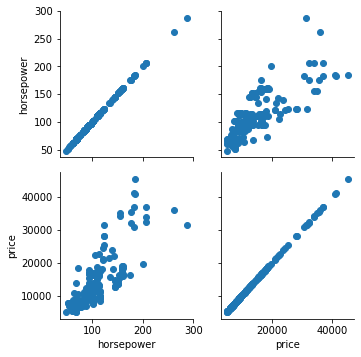

In [27]:
df_columns = ['horsepower', 'price'] #potencia do carro e preço do carro
df_new = df.filter(items=df_columns)
df_new.head(2)

from sklearn.preprocessing import StandardScaler
y = 'price'
x = df_new.drop([y], axis=1)
scaler = StandardScaler()
normalized_x = scaler.fit_transform(x)

m = sns.PairGrid(df_new)
print(m.map(plt.scatter))

modelo = sm.OLS(df_new[y], df_new.drop([y], axis =1))
res = modelo.fit()
res.summary()

#### Normalize

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.173
Model:                            OLS   Adj. R-squared (uncentered):              0.169
Method:                 Least Squares   F-statistic:                              42.67
Date:                Mon, 02 May 2022   Prob (F-statistic):                    5.06e-10
Time:                        16:38:32   Log-Likelihood:                         -2249.2
No. Observations:                 205   AIC:                                      4500.
Df Residuals:                     204   BIC:                                      4504.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower  6440.3359    985.939      6.532      0.000    4496.398    8384.274
==============================================================================
Omnibus:                       47.741   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.702
Skew:                           1.141   Prob(JB):                     1.22e-20
Kurtosis:                       5.352   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

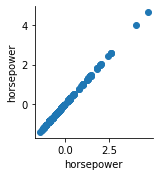

In [26]:
y = 'price'
x = df_new.drop([y], axis=1)
scaler = StandardScaler()
normalized_x = scaler.fit_transform(x)
normalized_x = pd.DataFrame(normalized_x, columns=x.columns)


m = sns.PairGrid(normalized_x) #####NORMALIZOU E O NUMERO FICOU MUITO PEQUENO COMPARADO COM O PRECO?
print(m.map(plt.scatter))

modelo = sm.OLS(df_new[y], normalized_x)
res = modelo.fit()
res.summary()